In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

## 1. 소득분위별 교통 소비액

In [2]:
transport=pd.read_csv('교통비.csv',encoding='utf-8')
transport.set_index(['월소득 5분위별'],inplace=True)
transport['2,3,4분위']=round((transport['1분위']+transport['2분위']+transport['3분위'])/3)
transport=transport[['1분위','2,3,4분위','5분위']]
transport['2,3,4분위']=transport['2,3,4분위'].astype('int64')

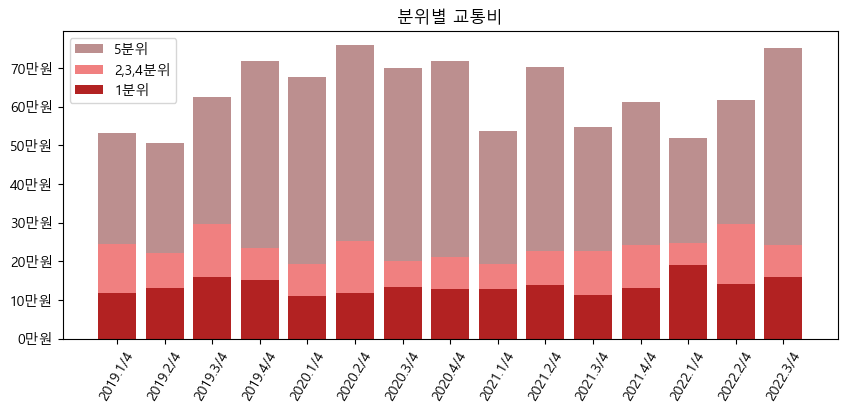

In [87]:
plt.figure(figsize=(10,4))
plt.bar(transport.index,transport['5분위'],color='rosybrown')
plt.bar(transport.index,transport['2,3,4분위'],color='lightcoral')
plt.bar(transport.index,transport['1분위'],color='firebrick')
plt.xticks([i for i in range(15)],rotation=60)
plt.yticks([i for i in range(0,800000,100000)],[f'{i}만원' for i in range(0,80,10)])
plt.title('분위별 교통비')
plt.legend(['5분위','2,3,4분위','1분위'])
plt.show()

### 1-1) 교통비가 차지하는 비율

In [4]:
incomes_5=pd.read_csv('5분위_소득.csv',encoding='utf-8')
incomes_234=pd.read_csv('234분위_소득.csv',encoding='utf-8')
incomes_1=pd.read_csv('1분위_소득.csv',encoding='utf-8')
incomes_1.drop(['가계수지항목별'],inplace=True,axis=1)
incomes_234.drop(['가계수지항목별'],inplace=True,axis=1)
incomes_5.drop(['가계수지항목별'],inplace=True,axis=1)
incomes_5.set_index(['월소득 5분위별'],inplace=True)
incomes_234.set_index(['월소득 5분위별'],inplace=True)
incomes_1.set_index(['월소득 5분위별'],inplace=True)

Text(0.5, 1.0, '3분위 교통비 비율')

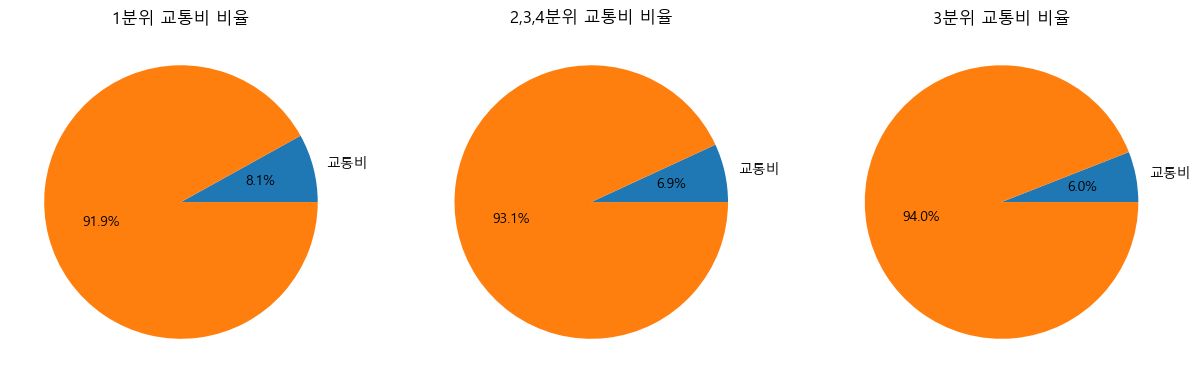

In [5]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.pie([transport.mean().iloc[0],incomes_1.mean(axis=1).iloc[0]-transport.mean().iloc[0]],autopct='%.1f%%',labels=['교통비',''])
plt.title('1분위 교통비 비율')


plt.subplot(1,3,2)
plt.pie([transport.mean().iloc[1],incomes_234.mean(axis=1).iloc[0]-transport.mean().iloc[1]],autopct='%.1f%%',labels=['교통비',''])
plt.title('2,3,4분위 교통비 비율')


plt.subplot(1,3,3)
plt.pie([transport.mean().iloc[2],incomes_5.mean(axis=1).iloc[0]-transport.mean().iloc[2]],autopct='%.1f%%',labels=['교통비',''])
plt.title('3분위 교통비 비율')


## 임의소비액

In [6]:
leisure_expense_1=pd.read_csv('1분위_임의소비액.csv',encoding='utf-8')
leisure_expense_1.drop(['가계수지항목별'],inplace=True,axis=1)
leisure_expense_1=int(round(leisure_expense_1.groupby('월소득 5분위별').sum().mean().mean()/3.75))
leisure_expense_1 # 3년 9개월

66404

In [7]:
leisure_expense=pd.read_csv('평균_임의소비액.csv',encoding='utf-8')
leisure_expense.drop(['가계수지항목별'],inplace=True,axis=1)
leisure_expense=int(round(leisure_expense.groupby('월소득 5분위별').sum().mean().mean()/3.75))
leisure_expense # 3년9개월

143829

Text(1, 143829, '143829원')

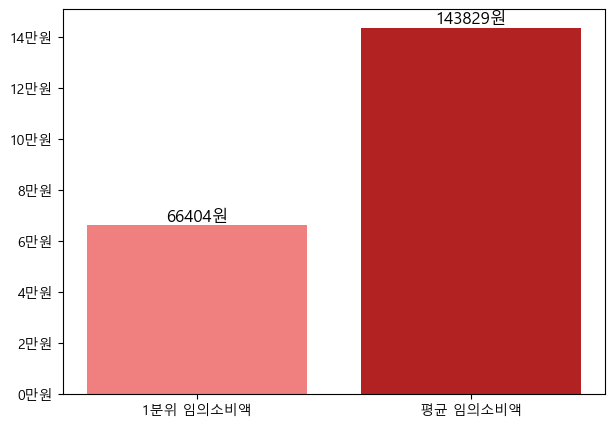

In [97]:
plt.figure(figsize=(7,5))
plt.bar([0,1],[leisure_expense_1,leisure_expense],color=['lightcoral','firebrick'])
plt.xticks([0,1],labels=['1분위 임의소비액','평균 임의소비액'])
plt.yticks([i for i in range(0,160000,20000)],[f'{i}만원' for i in range(0,16,2)])
plt.text(0,leisure_expense_1,f'{leisure_expense_1}원',ha = 'center',va='bottom',size=12)
plt.text(1,leisure_expense,f'{leisure_expense}원',ha = 'center',va='bottom',size=12)

## 임금상승

In [9]:
wage_incomes=pd.read_csv('전체_근로소득.csv',encoding='utf-8')
wage_incomes.drop(['가계수지항목별'],inplace=True,axis=1)
wage_incomes.set_index(['월소득 10분위별'],inplace=True)
wage_incomes_series=wage_incomes.mean(axis=0)

In [10]:
wage_incomes

,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4
월소득 10분위별,,,,,,,,,,,,,,,
１분위,234301,264813,245886,248619,165966,197212,204083,211761,165424,228935,209687,195726,247123,305452,307882
２분위,826517,918967,993082,1123620,858831,773694,902311,975348,860725,912775,981557,1002568,1059449,1247004,1194637
３분위,1454900,1665113,1745755,1758251,1469224,1339963,1553569,1567737,1403975,1442945,1633774,1713761,1610117,2039692,1982581
４분위,2120023,2218860,2360814,2228719,2012635,2043571,2209085,2195133,2065266,2242701,2076200,2321210,2347102,2643649,2361405
５분위,2599398,2809873,2810453,2818635,2404411,2576432,2661797,2874168,2481123,2684609,2800878,2930563,2801806,3183850,2937347
６분위,3206249,3159572,3211863,3244473,3153136,3138263,3453984,3187429,2951018,3105149,3552188,3312777,3268375,3624876,3898063
７분위,3727302,4149827,4211719,3910095,3952916,3809537,3936193,3996286,3937587,3873116,4070478,4067295,4096741,4180094,4485022
８분위,4593494,4415115,4601442,4653802,5007661,4506890,4958448,4561353,4676009,4880455,5216475,4862461,4995618,5038541,5319742
９분위,6213556,5771618,6104150,5781478,6435396,5683299,5978911,6003871,6230327,5670383,6222167,6299139,6534867,5729906,6770864


In [99]:
wage_incomes.iloc[0][0]

234301

Text(0.5, 1.0, '하위10% 근로소득')

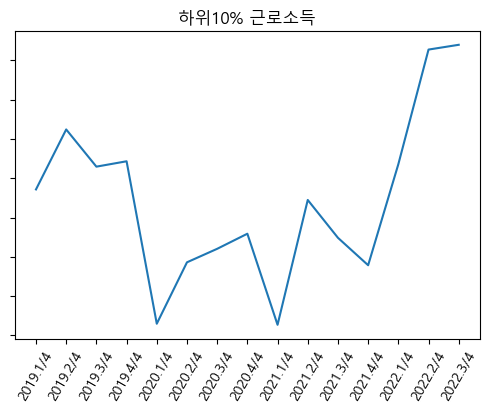

In [109]:
plt.figure(figsize=(6,4))
plt.plot(wage_incomes.columns,wage_incomes.iloc[0])
plt.xticks(rotation=60)
# plt.yticks(range(160000,310000,20000),[f'{i}'+'만원' for i in range(16,31,2)])
plt.yticks(range(160000,310000,20000),['' for i in range(16,31,2)])
# plt.text(wage_incomes.columns[0],wage_incomes.iloc[0][0]-7000,wage_incomes.iloc[0][0])
# plt.text(wage_incomes.columns[-2],wage_incomes.iloc[0][-2]-7000,wage_incomes.iloc[0][-1])
plt.title('하위10% 근로소득')

Text(0.5, 1.0, '평균 근로소득')

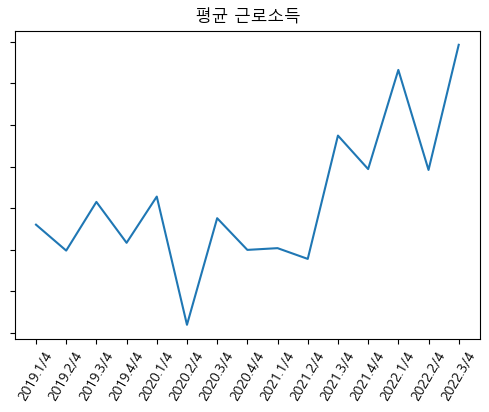

In [44]:
plt.figure(figsize=(6,4))
plt.plot(wage_incomes_series.index,wage_incomes_series.values)
plt.xticks(rotation=60)
plt.yticks(range(3200000,4000000,100000),['' for i in range(320,400,10)])
plt.title('평균 근로소득')

([<matplotlib.axis.YTick at 0x1313f179e20>,
 [Text(0, 0, '0만원'),
  Text(0, 500000, '50만원'),
  Text(0, 1000000, '100만원'),
  Text(0, 1500000, '150만원'),
  Text(0, 2000000, '200만원'),
  Text(0, 2500000, '250만원'),
  Text(0, 3000000, '300만원'),
  Text(0, 3500000, '350만원'),
  Text(0, 4000000, '400만원')])

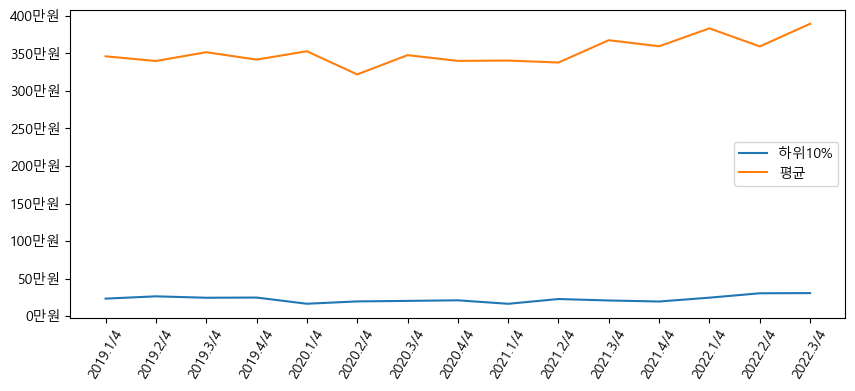

In [56]:
plt.figure(figsize=(10,4))
plt.plot(wage_incomes.columns,wage_incomes.iloc[0])
plt.plot(wage_incomes_series.index,wage_incomes_series.values)
plt.legend(['하위10%','평균'])
plt.xticks(rotation=60)
plt.yticks(range(0,4500000,500000),[f'{i}'+'만원' for i in range(0,450,50)])

In [14]:
age=pd.read_csv('평균연령.csv',encoding='utf-8')
age.drop(['가계수지항목별'],inplace=True,axis=1)
age.set_index(['월소득 10분위별'],inplace=True)
age=round(age.mean(axis=1),1)

In [59]:
age.index

Index(['１분위', '２분위', '３분위', '４분위', '５분위', '６분위', '７분위', '８분위', '９분위', '10분위'], dtype='object', name='월소득 10분위별')

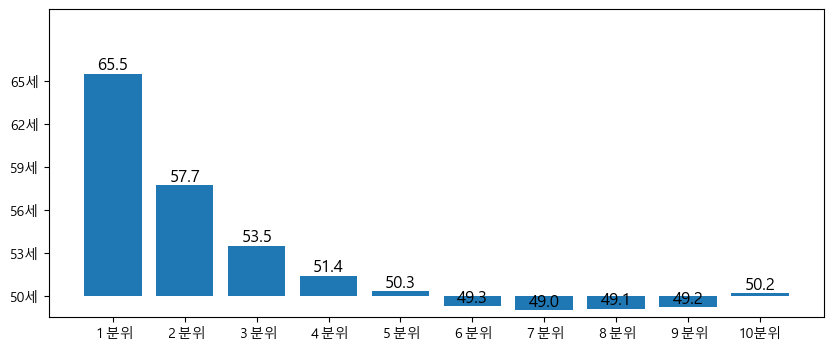

In [74]:
plt.figure(figsize=(10,4))
plt.bar(age.index,age.values-50)
plt.ylim(-1.5,20)
plt.yticks([i for i in range(0,16,3)],[f'{i}세' for i in range(50,66,3)])
for i in range(len(age)):
    plt.text(age.index[i],round(age.values[i]-50,1),round(age.values[i],1),ha = 'center',va='bottom',size=12)

## 소득 증가 추세

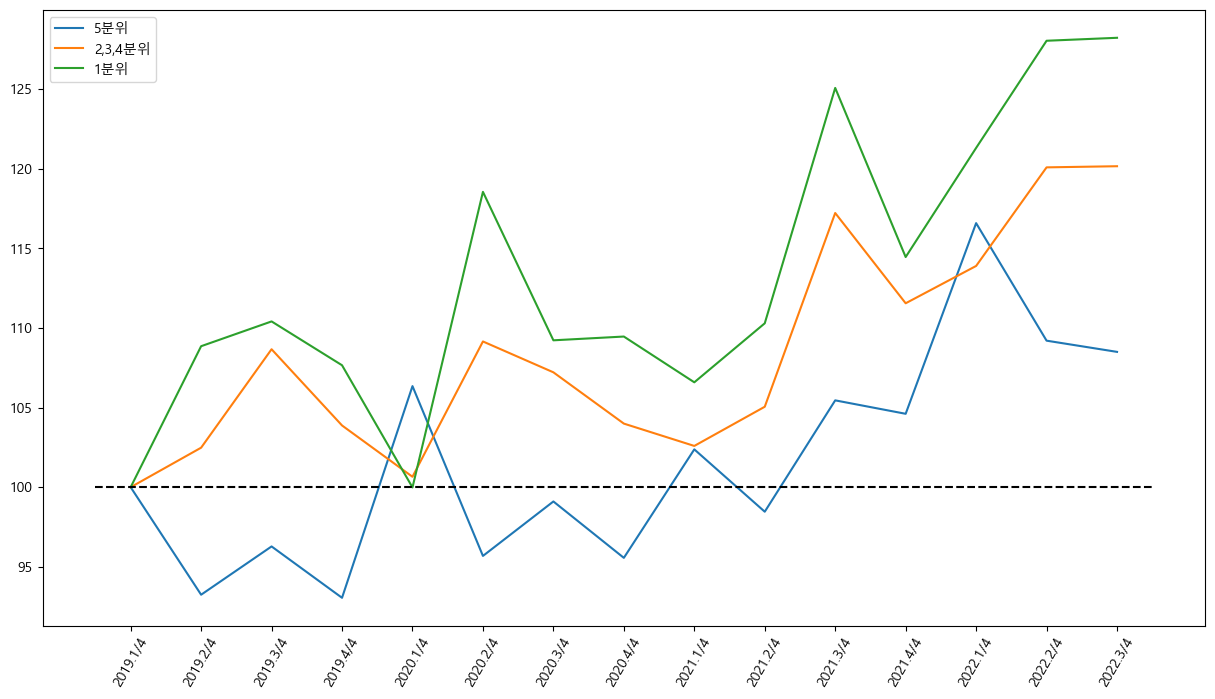

In [110]:
plt.figure(figsize=(15,8))
plt.plot(incomes_5.iloc[0]/incomes_5.iloc[0][0]*100,color='#1f77b4')
plt.plot(incomes_234.iloc[0]/incomes_234.iloc[0][0]*100,color='#ff7f0e')
plt.plot(incomes_1.iloc[0]/incomes_1.iloc[0][0]*100,color='#2ca02c')
plt.xticks([i for i in range(15)],rotation=60)
plt.legend(['5분위','2,3,4분위','1분위'])
plt.hlines(100,-0.5,14.5,colors='black',linestyles='--')
plt.show()

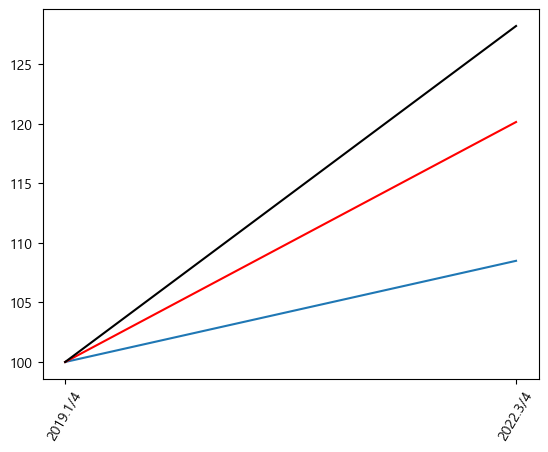

In [17]:
plt.plot([incomes_5.iloc[0][0]/incomes_5.iloc[0][0]*100,incomes_5.iloc[0][-1]/incomes_5.iloc[0][0]*100])
plt.plot([incomes_234.iloc[0][0]/incomes_234.iloc[0][0]*100,incomes_234.iloc[0][-1]/incomes_234.iloc[0][0]*100],color='red')
plt.plot([incomes_1.iloc[0][0]/incomes_1.iloc[0][0]*100,incomes_1.iloc[0][-1]/incomes_1.iloc[0][0]*100],color='black')
plt.xticks([i for i in range(2)],labels=[incomes_1.columns[0],incomes_1.columns[-1]],rotation=60)
plt.show()